In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.1.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
import os
import glob

#### Load the Dataset 

In [4]:
source = r"D:\projec\BBDC2019\Subjects"

In [5]:
#Loading the Drive helper and mount
#from google.colab import drive
#HERE Will prompt for authorisation
#drive.mount('/content/drive')

In [6]:
trainData=r"D:\projec\BBDC2019\train.csv"
testData=r"D:\projec\BBDC2019\challenge.csv"

In [7]:
df = pd.read_csv(trainData)

In [8]:
df.isnull().sum()

Subject     0
Datafile    0
Label       0
dtype: int64

In [9]:
df['Label'].value_counts()

curve-left-spin-Rfirst     320
curve-right-spin-Lfirst    301
walk                       300
run                        300
v-cut-right-Lfirst         300
v-cut-left-Lfirst          300
curve-right-spin-Rfirst    300
curve-left-step            299
curve-right-step           295
stand-to-sit               289
sit-to-stand               289
sit                        289
stand                      289
lateral-shuffle-left       282
jump-two-leg               280
v-cut-left-Rfirst          280
v-cut-right-Rfirst         280
curve-left-spin-Lfirst     280
jump-one-leg               279
stair-up                   278
stair-down                 278
lateral-shuffle-right      277
lay                         16
Name: Label, dtype: int64

In [10]:
indexNames = df[ df['Label'] == 'lay' ].index
df.drop(indexNames , inplace=True)

In [11]:
df['Label'].value_counts()

curve-left-spin-Rfirst     320
curve-right-spin-Lfirst    301
walk                       300
run                        300
v-cut-right-Lfirst         300
v-cut-left-Lfirst          300
curve-right-spin-Rfirst    300
curve-left-step            299
curve-right-step           295
stand-to-sit               289
sit-to-stand               289
sit                        289
stand                      289
lateral-shuffle-left       282
jump-two-leg               280
v-cut-left-Rfirst          280
v-cut-right-Rfirst         280
curve-left-spin-Lfirst     280
jump-one-leg               279
stair-down                 278
stair-up                   278
lateral-shuffle-right      277
Name: Label, dtype: int64

### Data Preparation

In [12]:
curveleftspinRfirst=df[df['Label']=='curve-left-spin-Rfirst'].head(277).copy()
curverightspinLfirst=df[df['Label']=='curve-right-spin-Lfirst'].head(277).copy()
vcutleftLfirst=df[df['Label']=='v-cut-left-Lfirst'].head(277).copy()
walk=df[df['Label']=='walk'].head(277).copy()
vcutrightLfirst=df[df['Label']=='v-cut-right-Lfirst'].head(277).copy()
curverightspiRfirst=df[df['Label']=='curve-right-spin-Rfirst'].head(277).copy()
run=df[df['Label']=='run'].head(277).copy()
curveleftstep=df[df['Label']=='curve-left-step'].head(277).copy()
curverightstep=df[df['Label']=='curve-right-step'].head(277).copy()
sit=df[df['Label']=='sit'].head(277).copy()
stand=df[df['Label']=='stand'].head(277).copy()
standtosit=df[df['Label']=='stand-to-sit'].head(277).copy()
sittostand=df[df['Label']=='sit-to-stand'].head(277).copy()
lateralshuffleleft=df[df['Label']=='lateral-shuffle-left'].head(277).copy()
curveleftspinLfirst=df[df['Label']=='curve-left-spin-Lfirst'].head(277).copy()
jumptwoleg=df[df['Label']=='jump-two-leg'].head(277).copy()
vcutrightRfirst=df[df['Label']=='v-cut-right-Rfirst'].head(277).copy()
vcutleftRfirst=df[df['Label']=='v-cut-left-Rfirst'].head(277).copy()
jumponeleg=df[df['Label']=='jump-one-leg'].head(277).copy()
stairup=df[df['Label']=='stair-up'].head(277).copy()
stairdown=df[df['Label']=='stair-down'].head(277).copy()
lateralshuffleright=df[df['Label']=='lateral-shuffle-right'].copy()

In [13]:
train = pd.DataFrame()
train = train.append([curverightstep,curveleftstep,stairup,walk,sittostand,curverightspinLfirst,run,
                      stairdown,jumptwoleg,vcutrightRfirst,vcutrightLfirst,vcutleftLfirst,sit,
                      curveleftspinRfirst,curveleftspinLfirst,lateralshuffleright,lateralshuffleleft,
                      vcutleftRfirst,standtosit,curverightspiRfirst,stand,jumponeleg])
train.shape

(6094, 3)

In [14]:
train

,Subject,Datafile,Label
14,Subject02,Subject02/Subject02_Aufnahme014.csv,curve-right-step
18,Subject02,Subject02/Subject02_Aufnahme018.csv,curve-right-step
47,Subject02,Subject02/Subject02_Aufnahme047.csv,curve-right-step
78,Subject02,Subject02/Subject02_Aufnahme078.csv,curve-right-step
99,Subject02,Subject02/Subject02_Aufnahme099.csv,curve-right-step
...,...,...,...
6154,Subject19,Subject19/Subject19_Aufnahme193.csv,jump-one-leg
6165,Subject19,Subject19/Subject19_Aufnahme204.csv,jump-one-leg
6185,Subject19,Subject19/Subject19_Aufnahme224.csv,jump-one-leg
6227,Subject19,Subject19/Subject19_Aufnahme266.csv,jump-one-leg


In [15]:
train['Datafile'] = train['Datafile'].str.replace('/','\\')

In [16]:
#show the complete path of our traing csv
train_cs = source+'\\'+train['Datafile']
#test_cs = source+'/'+test['Datafile']

# Specifying the path for each Subject in a list form

In [17]:
train_cs.head()

14    D:\projec\BBDC2019\Subjects\Subject02\Subject0...
18    D:\projec\BBDC2019\Subjects\Subject02\Subject0...
47    D:\projec\BBDC2019\Subjects\Subject02\Subject0...
78    D:\projec\BBDC2019\Subjects\Subject02\Subject0...
99    D:\projec\BBDC2019\Subjects\Subject02\Subject0...
Name: Datafile, dtype: object

In [18]:
from numba.typed import List
from numba import jit, njit, vectorize
from concurrent.futures import ThreadPoolExecutor

# Extracting  some information about each subject

In [19]:
@njit()
def get_min(x):
    m = np.min(x)
    return m
@njit()
def get_max(x):
    m = np.max(x)
    return m
@njit()
def get_mean(x):
    m = np.mean(x)
    return m
@njit()
def get_var(x):
    m = np.var(x)
    return m
@njit()
def get_mean(x):
    m = np.mean(x)
    return m
@njit()
def get_sum(x):
    m = x.sum()
    return m   

In [20]:
%%time
mean = []
var = []
maxi = []
mini = []
summ = []
for i in train_cs:
    matrix = pd.read_csv(i, header=None)
    matrix = np.array(matrix)
    m = get_mean(matrix)
    mean.append(m)
    v = get_var(matrix)
    var.append(v)
    mx = get_max(matrix)
    maxi.append(mx)
    mi = get_min(matrix)
    mini.append(mi)
    sm = get_sum(matrix)
    summ.append(sm)

Wall time: 4min 2s


In [21]:
train.insert(loc=2, column='Mean', value=['' for i in range(train.shape[0])])
train.insert(loc=3, column='Variance', value=['' for i in range(train.shape[0])])
train.insert(loc=4, column='max', value=['' for i in range(train.shape[0])])
train.insert(loc=5, column='min', value=['' for i in range(train.shape[0])])
train.insert(loc=6, column='sum', value=['' for i in range(train.shape[0])])
train['Mean']=mean
train['Variance']=var
train['max']=maxi
train['min']=mini
train['sum']=summ


In [22]:
train.head()

,Subject,Datafile,Mean,Variance,max,min,sum,Label
14,Subject02,Subject02\Subject02_Aufnahme014.csv,32154.571925,2.459942e+07,60904,80,3383979304,curve-right-step
18,Subject02,Subject02\Subject02_Aufnahme018.csv,32203.625143,2.291774e+07,63552,78,3848043372,curve-right-step
47,Subject02,Subject02\Subject02_Aufnahme047.csv,32175.105561,2.320577e+07,58720,81,3563425116,curve-right-step
78,Subject02,Subject02\Subject02_Aufnahme078.csv,32199.911544,2.146376e+07,62776,79,3774183832,curve-right-step
99,Subject02,Subject02\Subject02_Aufnahme099.csv,32174.890670,2.522334e+07,58356,79,3386117669,curve-right-step


In [23]:
train_df = train.drop(['Subject', 'Datafile'], axis = 1).copy()
train_df.head()

,Mean,Variance,max,min,sum,Label
14,32154.571925,2.459942e+07,60904,80,3383979304,curve-right-step
18,32203.625143,2.291774e+07,63552,78,3848043372,curve-right-step
47,32175.105561,2.320577e+07,58720,81,3563425116,curve-right-step
78,32199.911544,2.146376e+07,62776,79,3774183832,curve-right-step
99,32174.890670,2.522334e+07,58356,79,3386117669,curve-right-step


# Standardizing our Data

In [24]:
X = train_df.drop('Label',axis = 1)
y = train_df['Label']

In [25]:
%%time
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

scaled_X

Wall time: 5.1 ms


array([[ 0.63096764, -0.57874517,  0.10633219, -0.47512092,  2.54019782],
       [ 0.75866532, -0.67087014,  0.38781848, -0.47538813,  3.18515311],
       [ 0.68442178, -0.65509126, -0.12583022, -0.47498731,  2.78959124],
       ...,
       [ 0.78273084,  1.16450343,  0.59776389, -0.47752584, -0.81121733],
       [ 0.58644278,  0.48052084,  0.59723238, -0.48420618, -0.91621638],
       [ 0.45802034,  0.74349464,  0.59808279, -0.48487421, -0.86729051]])

# Implementing PCA on the Dataset

In [26]:
%%time
from sklearn.decomposition import PCA

Wall time: 1.32 s


In [27]:
%%time
# Project the data onto the 2 primary principal components
pca = PCA(n_components=3, random_state = 42)
pca.fit(scaled_X)

Wall time: 295 ms


PCA(copy=True, iterated_power='auto', n_components=3, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
X_pca = pca.transform(scaled_X)

In [29]:
Xpca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'])
Xpca_df

,PCA1,PCA2,PCA3
0,-0.955486,-0.213514,2.527151
1,-1.296065,-0.232041,3.126067
2,-0.872286,-0.224443,2.819093
3,-1.178142,-0.264798,3.068885
4,-0.826872,-0.243143,2.560654
...,...,...,...
6089,-0.655435,-0.636590,-0.882470
6090,-1.104867,-0.280306,-1.247534
6091,-1.067670,-0.582754,-1.189137
6092,-0.680507,-0.617866,-1.076210


In [30]:
scaled_X.shape, Xpca_df.shape

((6094, 5), (6094, 3))

In [31]:
Xpca_df.insert(loc=3, column='targets', value=['' for i in range(Xpca_df.shape[0])])

In [32]:
Xpca_df['targets'] = y.values

In [33]:
Xpca_df

,PCA1,PCA2,PCA3,targets
0,-0.955486,-0.213514,2.527151,curve-right-step
1,-1.296065,-0.232041,3.126067,curve-right-step
2,-0.872286,-0.224443,2.819093,curve-right-step
3,-1.178142,-0.264798,3.068885,curve-right-step
4,-0.826872,-0.243143,2.560654,curve-right-step
...,...,...,...,...
6089,-0.655435,-0.636590,-0.882470,jump-one-leg
6090,-1.104867,-0.280306,-1.247534,jump-one-leg
6091,-1.067670,-0.582754,-1.189137,jump-one-leg
6092,-0.680507,-0.617866,-1.076210,jump-one-leg


# Scatter plot Representation Using PCA1 and PCA2

Text(0, 0.5, 'Second Prrincipal Component Analysis')

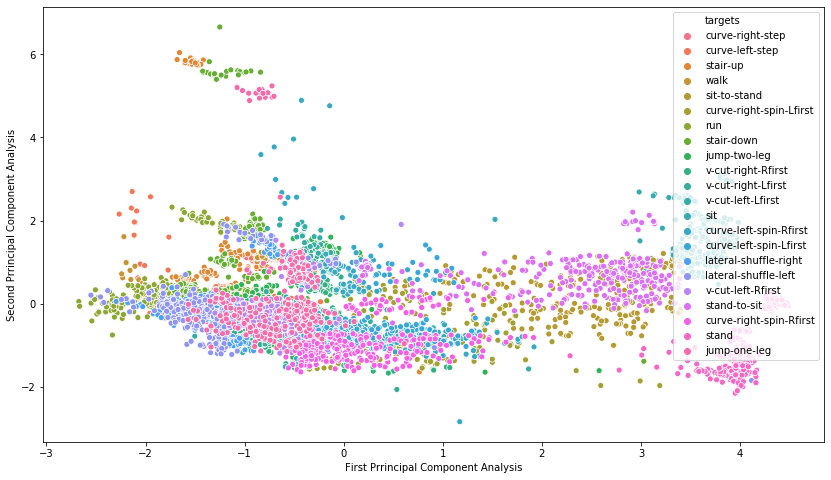

In [34]:
import seaborn as sns
import itertools
plt.figure(figsize=(14,8))

ax = sns.scatterplot(X_pca[:,0],X_pca[:,1], hue="targets",data=Xpca_df)
plt.xlabel('First Prrincipal Component Analysis')
plt.ylabel('Second Prrincipal Component Analysis')

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
label = LabelEncoder()
Xpca_df['label'] = label.fit_transform(Xpca_df['targets'])
Xpca_df.head()

,PCA1,PCA2,PCA3,targets,label
0,-0.955486,-0.213514,2.527151,curve-right-step,5
1,-1.296065,-0.232041,3.126067,curve-right-step,5
2,-0.872286,-0.224443,2.819093,curve-right-step,5
3,-1.178142,-0.264798,3.068885,curve-right-step,5
4,-0.826872,-0.243143,2.560654,curve-right-step,5


In [37]:
label.classes_

array(['curve-left-spin-Lfirst', 'curve-left-spin-Rfirst',
       'curve-left-step', 'curve-right-spin-Lfirst',
       'curve-right-spin-Rfirst', 'curve-right-step', 'jump-one-leg',
       'jump-two-leg', 'lateral-shuffle-left', 'lateral-shuffle-right',
       'run', 'sit', 'sit-to-stand', 'stair-down', 'stair-up', 'stand',
       'stand-to-sit', 'v-cut-left-Lfirst', 'v-cut-left-Rfirst',
       'v-cut-right-Lfirst', 'v-cut-right-Rfirst', 'walk'], dtype=object)

In [38]:
Xpca_dff = Xpca_df.drop('targets',axis = 1)
Xpca_dff

,PCA1,PCA2,PCA3,label
0,-0.955486,-0.213514,2.527151,5
1,-1.296065,-0.232041,3.126067,5
2,-0.872286,-0.224443,2.819093,5
3,-1.178142,-0.264798,3.068885,5
4,-0.826872,-0.243143,2.560654,5
...,...,...,...,...
6089,-0.655435,-0.636590,-0.882470,6
6090,-1.104867,-0.280306,-1.247534,6
6091,-1.067670,-0.582754,-1.189137,6
6092,-0.680507,-0.617866,-1.076210,6


In [39]:
sampl = []
x=0
for i in range(len(Xpca_dff)):
    x += 1/1000
    sampl.append(x)

In [40]:
Xpca_df['time']=sampl

In [41]:
activities = Xpca_df['targets'].value_counts().index

In [42]:
activities

Index(['curve-left-step', 'sit-to-stand', 'stand', 'curve-left-spin-Lfirst',
       'v-cut-right-Rfirst', 'walk', 'stair-up', 'v-cut-left-Lfirst',
       'v-cut-left-Rfirst', 'curve-right-spin-Rfirst', 'lateral-shuffle-right',
       'curve-left-spin-Rfirst', 'stair-down', 'jump-two-leg',
       'curve-right-spin-Lfirst', 'stand-to-sit', 'lateral-shuffle-left',
       'sit', 'v-cut-right-Lfirst', 'run', 'jump-one-leg', 'curve-right-step'],
      dtype='object')

# Frame representation for each activities

In [43]:
sampling = 1000

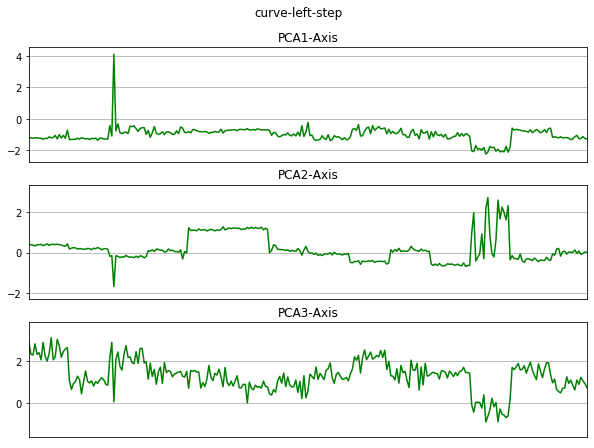

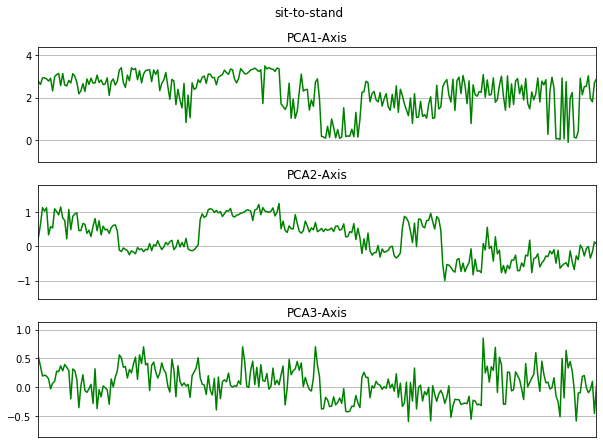

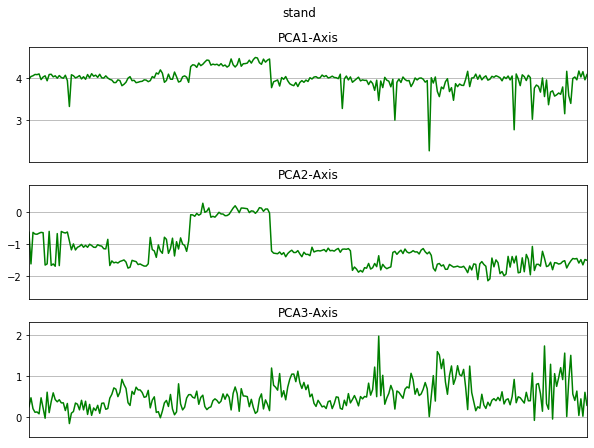

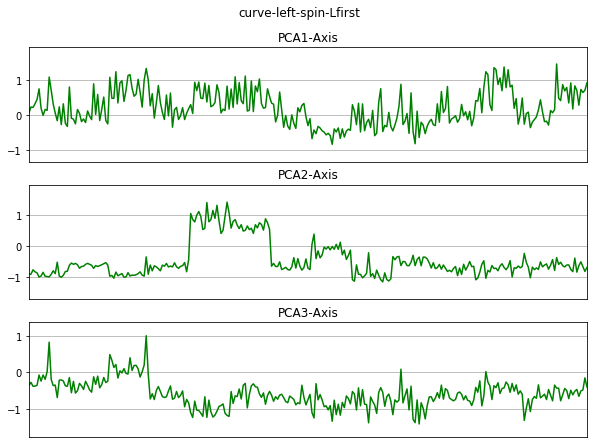

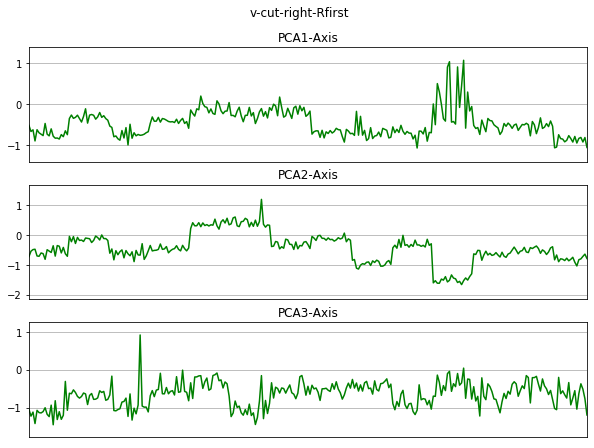

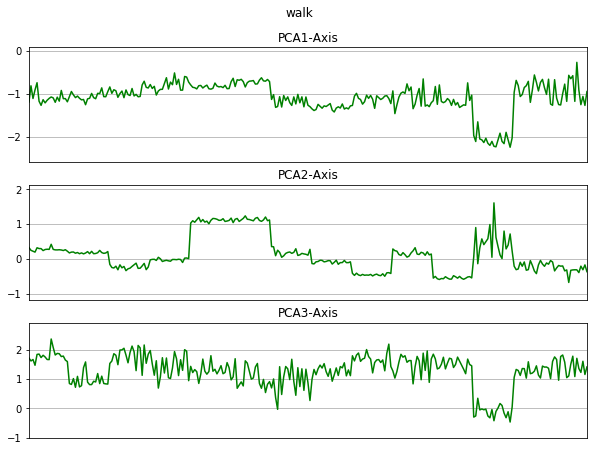

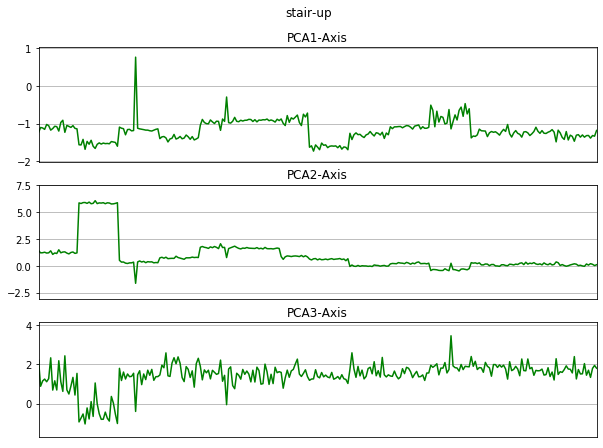

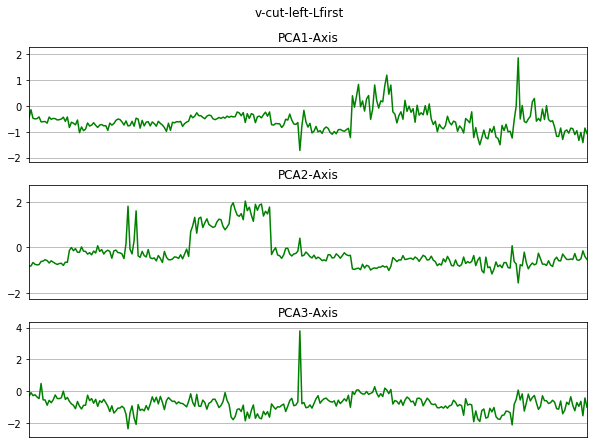

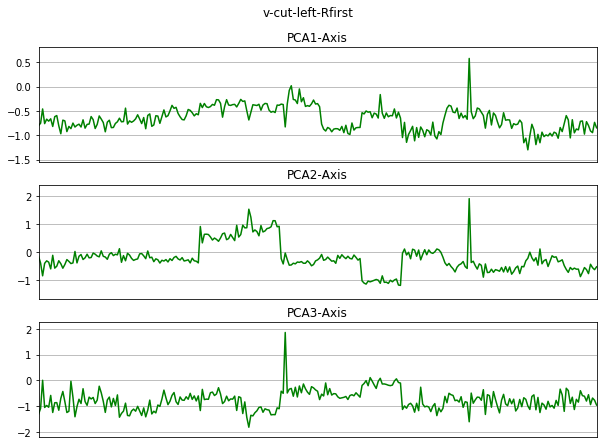

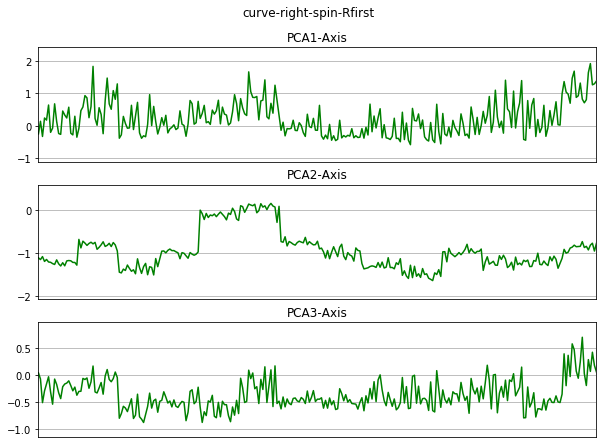

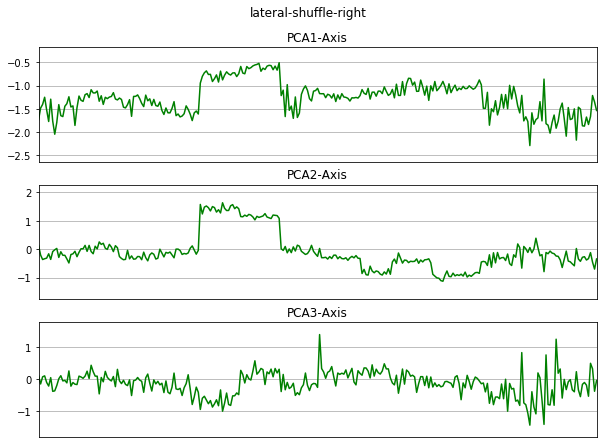

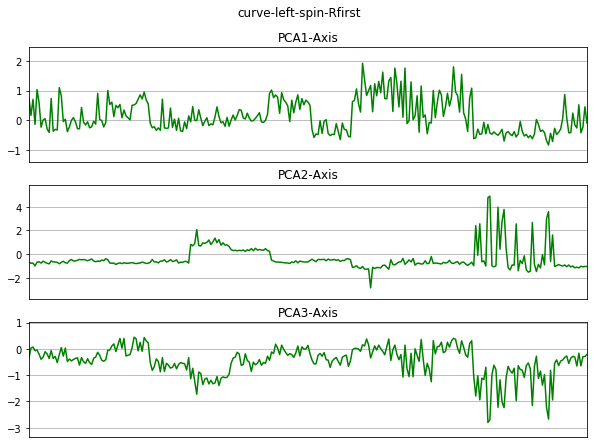

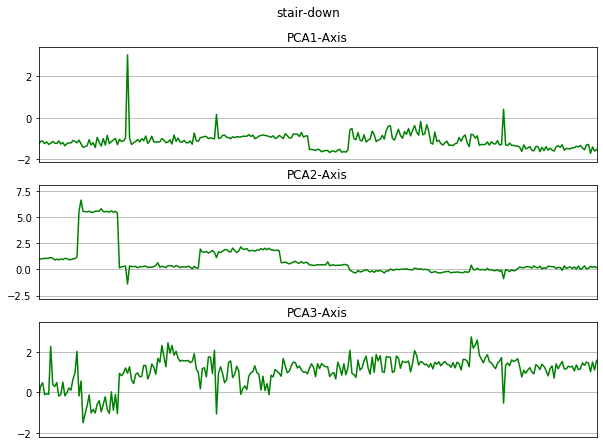

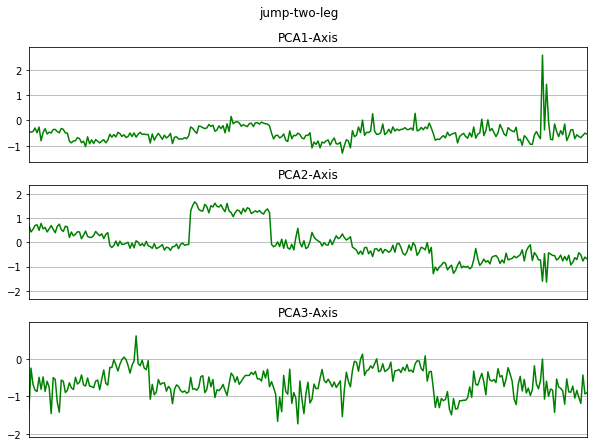

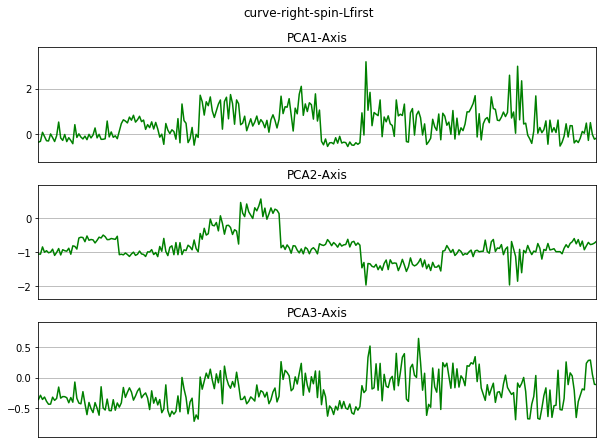

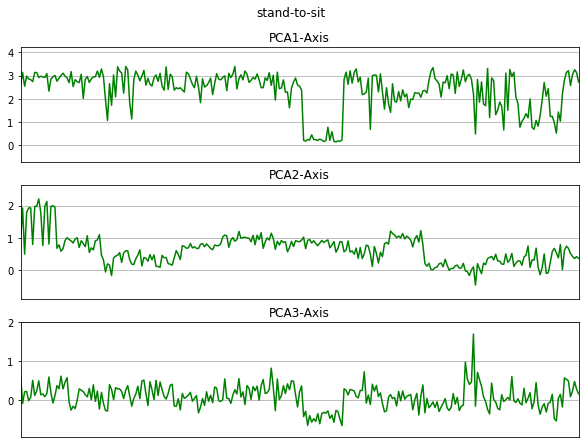

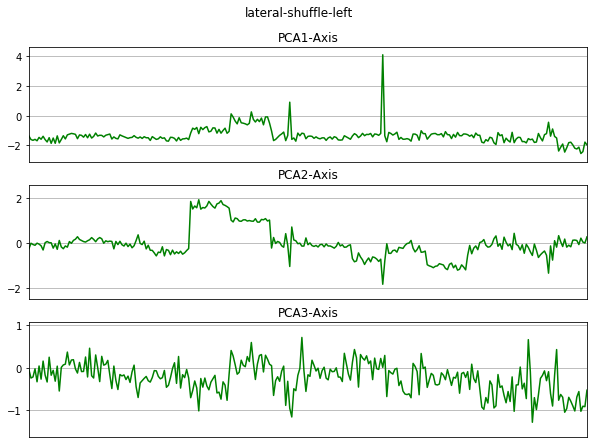

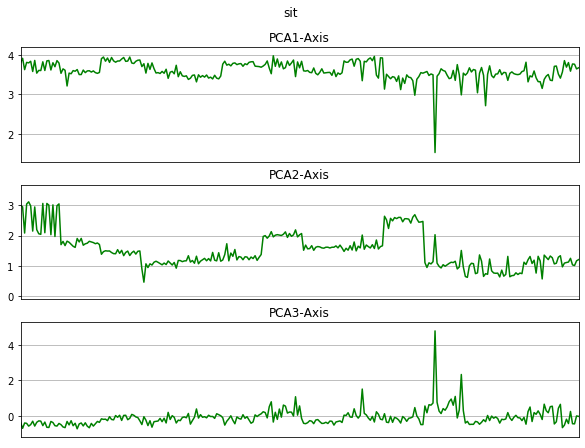

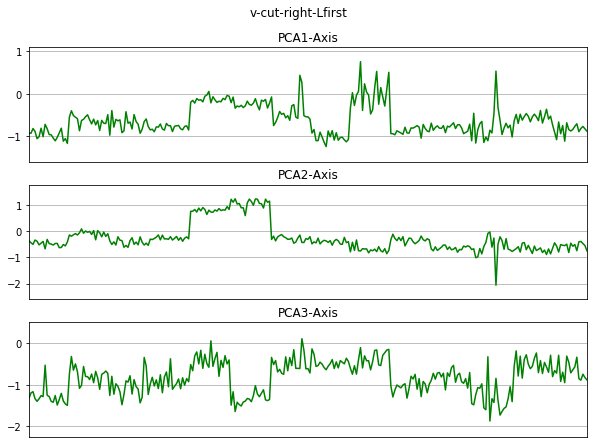

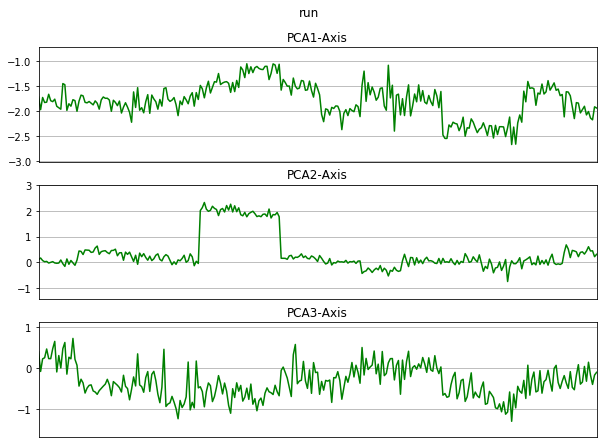

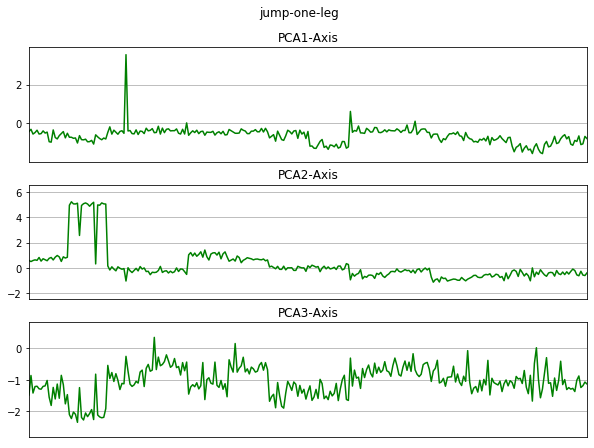

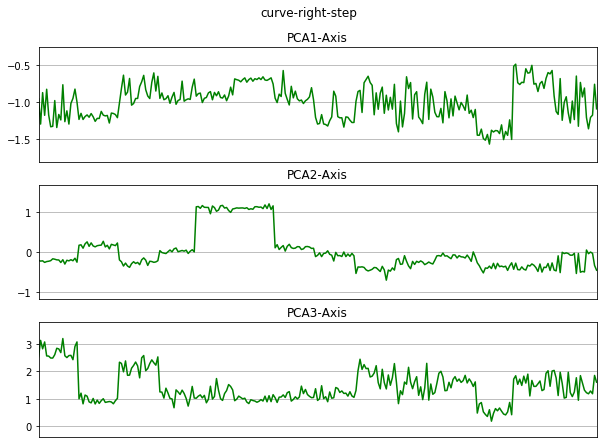

In [44]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(10, 7), sharex=True)
    plot_axis(ax0, data['time'], data['PCA1'], 'PCA1-Axis')
    plot_axis(ax1, data['time'], data['PCA2'], 'PCA2-Axis')
    plot_axis(ax2, data['time'], data['PCA3'], 'PCA3-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = Xpca_df[(Xpca_df['targets'] == activity)][:400]
    plot_activity(activity, data_for_plot)

### Frame For Training our 2D CNN

In [45]:
import scipy.stats as stats

In [77]:
frame_size = sampling//2 # 500
frame_size = int(frame_size)
hop_size = sampling//600 # 400
hop_size = int(hop_size)

In [78]:
def get_frames(Xpca_dff, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(Xpca_df) - frame_size, hop_size):
        x = Xpca_dff['PCA1'].values[i: i + frame_size]
        y = Xpca_dff['PCA2'].values[i: i + frame_size]
        z = Xpca_dff['PCA3'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        targets = stats.mode(Xpca_dff['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(targets)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [79]:
X, y = get_frames(Xpca_dff, frame_size, hop_size)

In [80]:
X.shape, y.shape

((5594, 500, 3), (5594,))

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [82]:
X_train.shape, X_test.shape

((4475, 500, 3), (1119, 500, 3))

In [83]:
X_train[0].shape, X_test[0].shape

((500, 3), (500, 3))

In [84]:
X_train = X_train.reshape(4475, 500, 3, 1)
X_test = X_test.reshape(1119, 500, 3, 1)

In [85]:
X_train[0].shape, X_test[0].shape

((500, 3, 1), (500, 3, 1))

### 2D CNN Model 

In [86]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(22, activation='softmax'))


In [87]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [88]:
history = model.fit(X_train, y_train, epochs = 10, validation_data= (X_test, y_test), verbose=1)

Train on 4475 samples, validate on 1119 samples
Epoch 1/10
4475/4475 [==============================] - 25s 6ms/sample - loss: 0.6448 - accuracy: 0.7839 - val_loss: 0.0977 - val_accuracy: 0.9696
Epoch 2/10
4475/4475 [==============================] - 24s 5ms/sample - loss: 0.1174 - accuracy: 0.9604 - val_loss: 0.1023 - val_accuracy: 0.9777
Epoch 3/10
4475/4475 [==============================] - 24s 5ms/sample - loss: 0.0756 - accuracy: 0.9779 - val_loss: 0.0429 - val_accuracy: 0.9893
Epoch 4/10
4475/4475 [==============================] - 24s 5ms/sample - loss: 0.0443 - accuracy: 0.9888 - val_loss: 0.0235 - val_accuracy: 0.9920
Epoch 5/10
4475/4475 [==============================] - 24s 5ms/sample - loss: 0.0308 - accuracy: 0.9902 - val_loss: 0.0336 - val_accuracy: 0.9920
Epoch 6/10
4475/4475 [==============================] - 24s 5ms/sample - loss: 0.0275 - accuracy: 0.9922 - val_loss: 0.0144 - val_accuracy: 0.9964
Epoch 7/10
4475/4475 [==============================] - 24s 5ms/sample

# Learning Curve

In [58]:
def plot_learningCurve(history, epochs):
    # Plot training & validation accuracy values
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

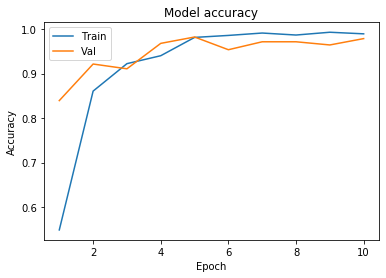

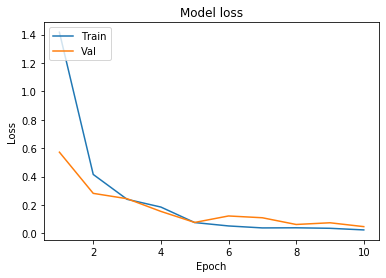

In [59]:
plot_learningCurve(history, 10)

### Confusion Matrix 

In [60]:
import mlxtend

In [61]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [62]:
y_pred = model.predict_classes(X_test)

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x19152e99908>)

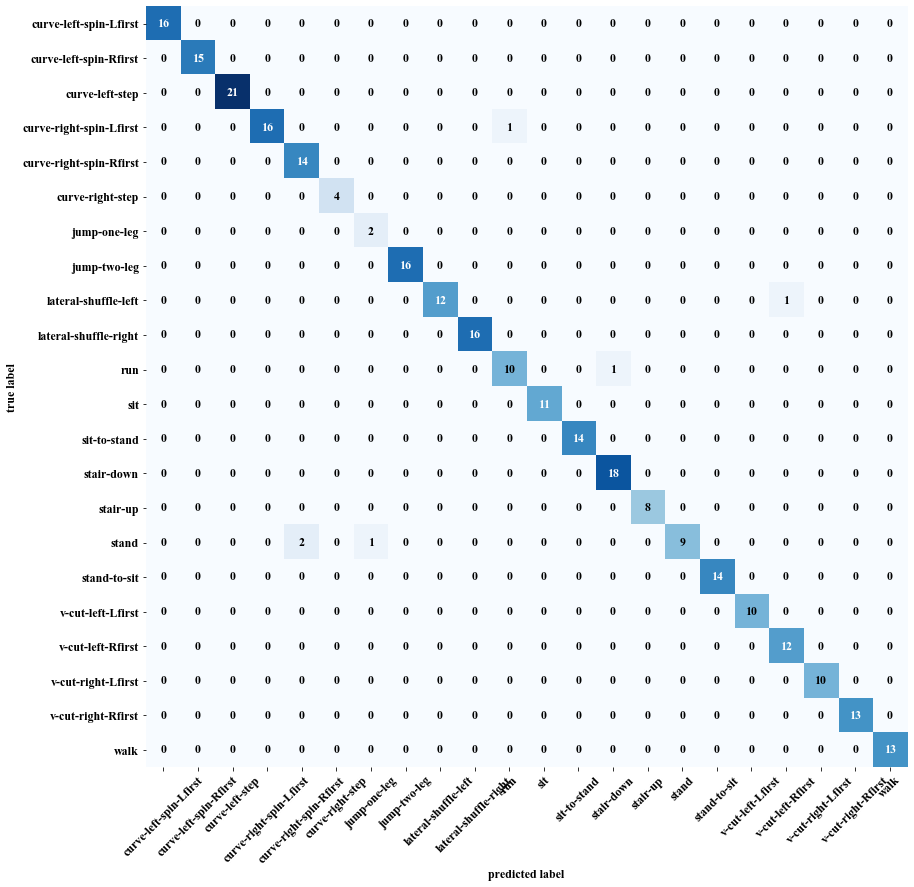

In [63]:
mat = confusion_matrix(y_test, y_pred)
font = {
    'family': 'Times New Roman',
    'size': 12
    
}

plt.rc('font',**font)
#conf_mat=mat, colorbar=True,show_absolute=False ,figsize=(14,12), show_normed=True, class_names=label.classes
plot_confusion_matrix(conf_mat=mat,
    hide_spines=True,
    hide_ticks=False,
    figsize=(14,14),
    cmap=None,
    colorbar=False,
    show_absolute=True,
    show_normed=False,
    class_names=label.classes_,)